<a href="https://colab.research.google.com/github/gorkemturkut57/Plate_Detection_Project/blob/main/Plate_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

"""
resim_adresler = os.listdir("veriseti")

img = cv2.imread("veriseti/"+resim_adresler[7])
img = cv2.resize(img,(500,500))

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

img_bgr = img
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray,cmap="gray")
plt.show()

#islem resmi ir_img

ir_img = cv2.medianBlur(img_gray,5) #5x5
ir_img = cv2.medianBlur(ir_img,5) #5x5

plt.imshow(ir_img,cmap="gray")
plt.show()

medyan = np.median(ir_img)

low = 0.67*medyan
high = 1.33*medyan

#Jonh f Canny
kenarlik = cv2.Canny(ir_img,low,high)

plt.imshow(kenarlik,cmap="gray")
plt.show()


# np.ones((3,3),np.uint8) -->
kenarlik = cv2.dilate(kenarlik,np.ones((3,3),np.uint8),iterations=1)

plt.imshow(kenarlik,cmap="gray")
plt.show()


#cv2.RETR_TREE -> hiyeralsık
#CHAIN_APPROX_SIMPLE -> kosegenleri aldık, tum pıkseller yerine
cnt = cv2.findContours(kenarlik,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = cnt[0]
cnt = sorted(cnt,key=cv2.contourArea,reverse=True)

H,W = 500,500
plaka = None

for c in cnt:
    rect = cv2.minAreaRect(c) #dikdortgen yapıda al (1)
    (x,y),(w,h),r = rect
    if(w>h and w>h*2) or (h>w and h>w*2):#oran en az 2 (2)
        box = cv2.boxPoints(rect) #[[12,13],[25,13],[20,13],[13,45]]
        box = np.int64(box)

        minx = np.min(box[:,0])
        miny = np.min(box[:,1])
        maxx = np.max(box[:,0])
        maxy = np.max(box[:,1])


        muh_plaka = img_gray[miny:maxy,minx:maxx].copy()
        muh_medyan = np.median(muh_plaka)


        kon1 = muh_medyan>85 and muh_medyan<200 # yogunluk kontrolu (3)
        kon2 = h<50 and w<150 #sınır kontrolu (4)
        kon3 = w<50 and h<150 #sınır kontrolu (4)

        print(f"muh_plaka medyan:{muh_medyan} genislik: {w} yukseklik:{h}")

        plt.figure()
        kon=False
        if(kon1 and (kon2 or kon3)):
            #plaka'dır

            cv2.drawContours(img,[box],0,(0,255,0),2)
            plaka =[int(i) for i in [minx,miny,w,h]]#x,y,w,h

            plt.title("plaka tespit edildi !!!")
            kon=True
        else:
            #plaka değidir
            cv2.drawContours(img,[box],0,(0,0,255),2)
            plt.title("plaka tespit edilemedi!")

        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.show()

        if(kon):
            break

#plaka bulunmustur!!!
"""

def plaka_konum_don(img):

    img_bgr = img
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #islem resmi ir_img

    ir_img = cv2.medianBlur(img_gray,5) #5x5
    ir_img = cv2.medianBlur(ir_img,5) #5x5

    medyan = np.median(ir_img)

    low = 0.67*medyan
    high = 1.33*medyan

    kenarlik = cv2.Canny(ir_img,low,high)


    # np.ones((3,3),np.uint8) -->
    kenarlik = cv2.dilate(kenarlik,np.ones((3,3),np.uint8),iterations=1)

    #cv2.RETR_TREE -> hiyeralsık
    #CHAIN_APPROX_SIMPLE -> kosegenleri aldık, tum pıkseller yerine
    cnt = cv2.findContours(kenarlik,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = cnt[0]
    cnt = sorted(cnt,key=cv2.contourArea,reverse=True)

    H,W = 500,500
    plaka = None

    for c in cnt:
        rect = cv2.minAreaRect(c) #dikdortgen yapıda al (1)
        (x,y),(w,h),r = rect
        if(w>h and w>h*2) or (h>w and h>w*2):#oran en az 2 (2)
            box = cv2.boxPoints(rect) #[[12,13],[25,13],[20,13],[13,45]]
            box = np.int64(box)

            minx = np.min(box[:,0])
            miny = np.min(box[:,1])
            maxx = np.max(box[:,0])
            maxy = np.max(box[:,1])


            muh_plaka = img_gray[miny:maxy,minx:maxx].copy()
            muh_medyan = np.median(muh_plaka)


            kon1 = muh_medyan>84 and muh_medyan<200 # yogunluk kontrolu (3)
            kon2 = h<50 and w<150 #sınır kontrolu (4)
            kon3 = w<50 and h<150 #sınır kontrolu (4)

            print(f"muh_plaka medyan:{muh_medyan} genislik: {w} yukseklik:{h}")

            kon=False
            if(kon1 and (kon2 or kon3)):
                #plaka'dır

                #cv2.drawContours(img,[box],0,(0,255,0),2)
                plaka =[int(i) for i in [minx,miny,w,h]]#x,y,w,h
                kon=True
            else:
                #plaka değidir
                #cv2.drawContours(img,[box],0,(0,0,255),2)
                pass
            if(kon):
                return plaka
    return []

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

veriler = os.listdir("veriseti")

isim = veriler[3]

img = cv2.imread("veriseti/"+isim)
img = cv2.resize(img,(500,500))

plaka = plaka_konum_don(img)
x,y,w,h = plaka

if(w>h):
    plaka_bgr = img[y:y+h,x:x+w].copy()
else:
    plaka_bgr = img[y:y+w,x:x+h].copy()

plt.imshow(plaka_bgr)
plt.show()

H,W = plaka_bgr.shape[:2]
print("orjinal boyut:",W,H)
H,W=H*2,W*2
print("yeni boyut:",W,H)

plaka_bgr = cv2.resize(plaka_bgr,(W,H))

plt.imshow(plaka_bgr)
plt.show()

#plaka_resim : islem resmimmiz
plaka_resim = cv2.cvtColor(plaka_bgr,cv2.COLOR_BGR2GRAY)

plt.title("gri format")
plt.imshow(plaka_resim,cmap="gray")
plt.show()


th_img = cv2.adaptiveThreshold(plaka_resim,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)

plt.title("eşiklenmiş")
plt.imshow(th_img,cmap="gray")
plt.show()

kernel = np.ones((3,3),np.uint8)
th_img = cv2.morphologyEx(th_img,cv2.MORPH_OPEN,kernel,iterations=1)

plt.title("Gürültü yok edilmiş")
plt.imshow(th_img,cmap="gray")
plt.show()

cnt = cv2.findContours(th_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = cnt[0]
cnt = sorted(cnt,key=cv2.contourArea,reverse=True)[:15]



for i,c in enumerate(cnt):
    rect = cv2.minAreaRect(c)
    (x,y),(w,h),r = rect

    kon1 =  max([w,h])<W/4
    kon2 = w*h > 200

    if(kon1 and kon2):
        print("karakter ->",x,y,w,h)

        box = cv2.boxPoints(rect)
        box = np.int64(box)
        #(15,20)

        minx = np.min(box[:,0])
        miny = np.min(box[:,1])
        maxx = np.max(box[:,0])
        maxy = np.max(box[:,1])

        odak = 2

        minx = max(0,minx-odak)
        miny = max(0,miny-odak)
        maxx = min(W,maxx+odak)
        maxy = min(H,maxy+odak)

        kesim = plaka_bgr[miny:maxy,minx:maxx].copy()

        try:
            cv2.imwrite(f"karakterseti/{isim}_{i}.jpg",kesim)
        except:
            pass

        yaz = plaka_bgr.copy()
        cv2.drawContours(yaz,[box],0,(0,255,0),1)

        plt.imshow(yaz)
        plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'veriseti'

In [ ]:
import cv2
import numpy as np
import pandas as pd

import pickle

import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier # kutupahemiz

import os

path = "/content/drive/MyDrive/karakter_seti/karakterseti/"
siniflar = os.listdir(path)
tek_batch = 0

urls = []
sinifs = []
for sinif in siniflar:
    resimler = os.listdir(path+sinif)
    for resim in resimler:
        urls.append(path+sinif+"/"+resim)
        sinifs.append(sinif)
        tek_batch+=1


df = pd.DataFrame({"adres":urls,"sinif":sinifs})


def islem(img):

    yeni_boy = img.reshape((1600,5,5))
    orts = []
    for parca in yeni_boy:
        ort = np.mean(parca)
        orts.append(ort)
    orts = np.array(orts)
    orts = orts.reshape(1600,)
    return orts

def on_isle(img):
    return img/255

target_size=(200,200)
batch_size=tek_batch


train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=on_isle)

train_set = train_gen.flow_from_dataframe(df,x_col = "adres",y_col="sinif",
                                              target_size=target_size,
                                              color_mode = "grayscale",
                                              shuffle=True,
                                              class_mode='sparse',
                                              batch_size=batch_size)


images,train_y = next(train_set)
train_x = np.array(list(map(islem,images))).astype("float32")
train_y= train_y.astype(int)

print("svm egitiliyor")
rfc = RandomForestClassifier(n_estimators=10,criterion="entropy")
rfc.fit(train_x,train_y)


pred = rfc.predict(train_x)

acc = accuracy_score(pred,train_y)

print("başarı:",acc)



dosya = "rfc_model.rfc"

pickle.dump(rfc,open(dosya,"wb"))

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import pickle

def islem(img):
    yeni_boy = img.reshape((1600,5,5))
    orts = []
    for parca in yeni_boy:
        ort = np.mean(parca)
        orts.append(ort)
    orts = np.array(orts)
    orts = orts.reshape(1600,)
    return orts


dosya = "rfc_model.rfc"
rfc = pickle.load(open(dosya,"rb"))


path = "/content/drive/MyDrive/karakter_seti/karakterseti/"
siniflar = os.listdir(path)
tek_batch = 0

urls = []
sinifs = []
for sinif in siniflar:
    resimler = os.listdir(path+sinif)
    for resim in resimler:
        urls.append(path+sinif+"/"+resim)
        sinifs.append(sinif)
        tek_batch+=1




df = pd.DataFrame({"adres":urls,"sinif":sinifs})

sinifs = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10,
          'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20,
          'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30,
          'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'arkaplan': 36}

ayrisma_sinifs = ["arka","harf","sayi"]
index = list(sinifs.values())
siniflar = list(sinifs.keys())


df = df.sample(frac=1)
for adres,sinif in df.values:
    st_adres = adres.split("/")
    st0 = st_adres[-2][0].lower()
    st1 = st_adres[-1][0].lower()
    if(st0 == st1):
        continue
    image = cv2.imread(adres,0)
    resim = cv2.resize(image,(200,200))
    resim = resim/255
    oznitelikler = islem(resim)

    sonuc = rfc.predict([oznitelikler])[0]
    print(sonuc)
    ind = index.index(sonuc)
    sinif = siniflar[ind]
    plt.imshow(resim,cmap="gray")
    plt.title(f"fotoraftaki karakter: {sinif} ")
    plt.show()

In [ ]:
import cv2
import numpy as np
import pickle
dosya = "rfc_model.rfc"
rfc = pickle.load(open(dosya,"rb"))
sinifs = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10,
          'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20,
          'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30,
          'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'arkaplan': 36}

index = list(sinifs.values())
siniflar = list(sinifs.keys())

def islem(img):
    yeni_boy = img.reshape((1600,5,5))
    orts = []
    for parca in yeni_boy:
        ort = np.mean(parca)
        orts.append(ort)
    orts = np.array(orts)
    orts = orts.reshape(1600,)
    return orts

def plakaAyristir(mevcutPlaka):
    mevcutPlaka = sorted(mevcutPlaka,key=lambda x:x[1])
    mevcutPlaka = np.array(mevcutPlaka)
    mevcutPlaka = mevcutPlaka[:,0]
    mevcutPlaka = mevcutPlaka.tolist()

    # plaka bir sayı ile başlamalı
    # plakanin basında en fazla 2 rakam bulunabilir
    karakterAdim=0
    for i in range(len(mevcutPlaka)):

        try:
            int(mevcutPlaka[i])
            karakterAdim+=1
        except:
            if karakterAdim>0:
                if i-2>=0:
                    mevcutPlaka = mevcutPlaka[i-2:]

                break
            mevcutPlaka.pop(i)



    # plaka bir sayi ile bitmeli
    # plakanın sonunda en fazla 4 rakam olabilir
    karakterAdim=0
    for i in range(len(mevcutPlaka)):
        kontrolIndex = -1 + (-1*karakterAdim)
        try:
            int(mevcutPlaka[kontrolIndex])
            karakterAdim+=1
        except:
            if karakterAdim>0:
                karIndex = len(mevcutPlaka)-karakterAdim
                print("karkter:",mevcutPlaka[karIndex])
                mevcutPlaka = mevcutPlaka[:karIndex+4]
                break
            mevcutPlaka.pop(kontrolIndex)

    return mevcutPlaka
def plakaTani(img,plaka):
    global index,siniflar
    x,y,w,h = plaka

    if(w>h):
        plaka_bgr = img[y:y+h,x:x+w].copy()
    else:
        plaka_bgr = img[y:y+w,x:x+h].copy()


    H,W = plaka_bgr.shape[:2]
    H,W=H*2,W*2
    plaka_bgr = cv2.resize(plaka_bgr,(W,H))

    #plaka_resim : islem resmimmiz
    plaka_resim = cv2.cvtColor(plaka_bgr,cv2.COLOR_BGR2GRAY)

    th_img = cv2.adaptiveThreshold(plaka_resim,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)

    kernel = np.ones((3,3),np.uint8)
    th_img = cv2.morphologyEx(th_img,cv2.MORPH_OPEN,kernel,iterations=1)

    cnt = cv2.findContours(th_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnt = cnt[0]
    cnt = sorted(cnt,key=cv2.contourArea,reverse=True)[:15]

    yaz = plaka_bgr.copy()
    mevcutPlaka = []
    for i,c in enumerate(cnt):
        rect = cv2.minAreaRect(c)
        (x,y),(w,h),r = rect

        kon1 =  max([w,h])<W/4
        kon2 = w*h > 200

        if(kon1 and kon2):
            box = cv2.boxPoints(rect)
            box = np.int64(box)
            #(15,20)

            minx = np.min(box[:,0])
            miny = np.min(box[:,1])
            maxx = np.max(box[:,0])
            maxy = np.max(box[:,1])

            odak = 2

            minx = max(0,minx-odak)
            miny = max(0,miny-odak)
            maxx = min(W,maxx+odak)
            maxy = min(H,maxy+odak)

            kesim = plaka_bgr[miny:maxy,minx:maxx].copy()

            tani = cv2.cvtColor(kesim,cv2.COLOR_BGR2GRAY)
            tani = cv2.resize(tani,(200,200))
            tani = tani/255
            oznitelikler = islem(tani)
            karakter = rfc.predict([oznitelikler])[0]
            ind = index.index(karakter)
            sinif = siniflar[ind]
            if sinif=="arkaplan":
                continue

            cv2.putText(yaz,sinif,(minx-2,miny-2),cv2.FONT_HERSHEY_SIMPLEX,0.5,
                        (0,255,0),1)
            mevcutPlaka.append([sinif,minx])
            cv2.drawContours(yaz,[box],0,(0,255,0),1)
    if len(mevcutPlaka)>0:
        mevcutPlaka = plakaAyristir(mevcutPlaka)

    return yaz,mevcutPlaka

resim: veriseti/4.jpg
muh_plaka medyan:40.0 genislik: 59.472023010253906 yukseklik:170.19952392578125
muh_plaka medyan:178.0 genislik: 36.10138702392578 yukseklik:122.37333679199219
karkter: 4
resimdeki plaka: ['0', '6', 'B', 'M', 'W', '4', '8']


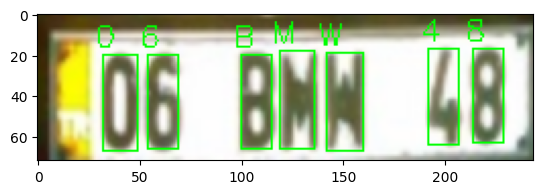

resim: veriseti/5.jpg
muh_plaka medyan:82.0 genislik: 44.48076629638672 yukseklik:279.1145935058594
muh_plaka medyan:168.0 genislik: 36.40203857421875 yukseklik:116.91158294677734
karkter: 0
resimdeki plaka: ['6', '4', 'Z', 'S', '0', '6', '3']


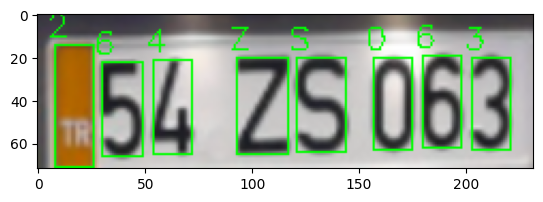

resim: veriseti/8.jpg
muh_plaka medyan:176.0 genislik: 292.3840026855469 yukseklik:108.3248519897461
muh_plaka medyan:102.0 genislik: 159.74746704101562 yukseklik:74.11510467529297
muh_plaka medyan:178.0 genislik: 108.0 yukseklik:33.0
karkter: 1
resimdeki plaka: ['3', '4', 'G', 'S', '1', '9', '0', '5']


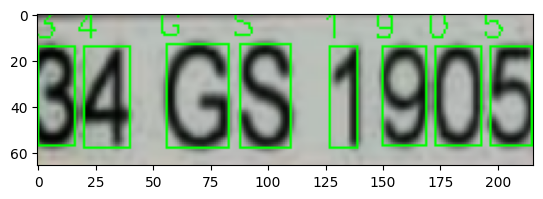

resim: veriseti/1.jpg
muh_plaka medyan:157.0 genislik: 47.968902587890625 yukseklik:120.45247650146484
resimdeki plaka: ['4']


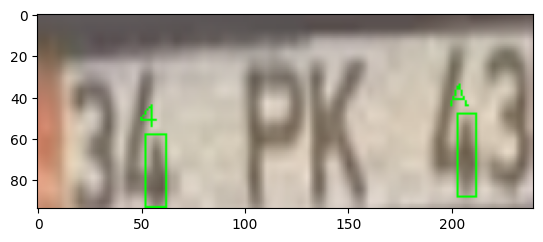

resim: veriseti/7.jpg
muh_plaka medyan:nan genislik: 332.6142578125 yukseklik:134.76425170898438
muh_plaka medyan:112.0 genislik: 207.74790954589844 yukseklik:31.717761993408203
muh_plaka medyan:49.0 genislik: 20.197193145751953 yukseklik:145.11317443847656
muh_plaka medyan:162.0 genislik: 30.47106170654297 yukseklik:83.41506958007812


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


karkter: 7
resimdeki plaka: ['0', '1', 'B', 'V', '7', '0', '8']


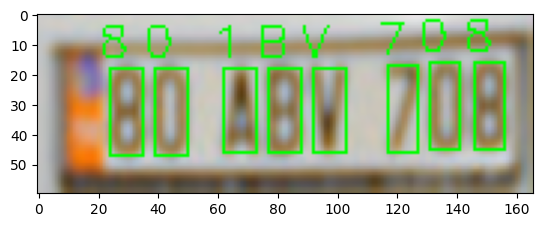

resim: veriseti/9.jpg
muh_plaka medyan:121.0 genislik: 316.0356750488281 yukseklik:96.24461364746094
muh_plaka medyan:114.0 genislik: 34.0 yukseklik:144.0
karkter: 2
resimdeki plaka: ['4', '5', 'Y', '2', '1', '1', '5']


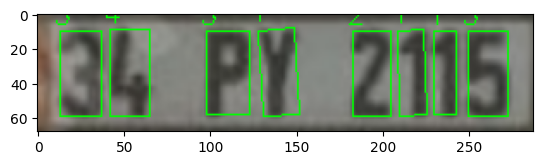

resim: veriseti/2.jpg
muh_plaka medyan:28.0 genislik: 189.86990356445312 yukseklik:51.44539260864258
muh_plaka medyan:139.0 genislik: 33.0 yukseklik:131.0
resimdeki plaka: []


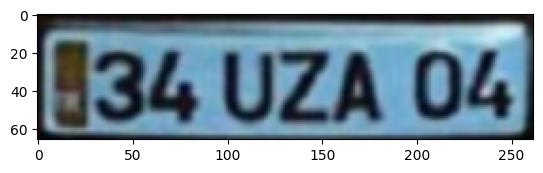

resim: veriseti/3.jpg
muh_plaka medyan:156.0 genislik: 323.99700927734375 yukseklik:104.8531723022461
muh_plaka medyan:85.0 genislik: 34.10713577270508 yukseklik:135.46644592285156
karkter: 7
resimdeki plaka: ['3', '4', 'S', 'L', 'M', '7', '1']


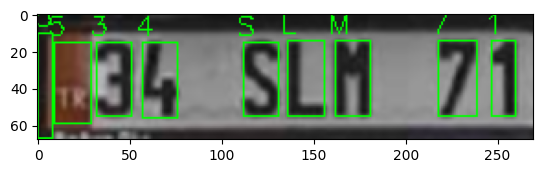

resim: veriseti/6.jpg
muh_plaka medyan:115.0 genislik: 124.0 yukseklik:277.0
muh_plaka medyan:111.0 genislik: 110.95187377929688 yukseklik:258.9374084472656
muh_plaka medyan:117.0 genislik: 197.17140197753906 yukseklik:82.45980072021484
muh_plaka medyan:134.0 genislik: 123.58023834228516 yukseklik:45.412166595458984
karkter: 3
resimdeki plaka: ['4', '5', 'Y', '3', '9', '9', '4']


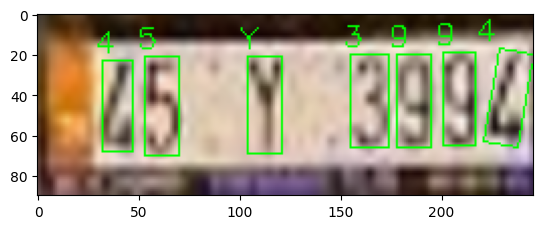

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

veriler = os.listdir("veriseti")

isim = veriler[4]

for isim in veriler:
    print("resim:","veriseti/"+isim)
    img = cv2.imread("veriseti/"+isim)
    img = cv2.resize(img,(500,500))

    plaka = plaka_konum_don(img)
    plakaImg,plakaKarakter = plakaTani(img,plaka)
    print("resimdeki plaka:",plakaKarakter)
    plt.imshow(plakaImg)
    plt.show()